In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr
import scipy.stats as stats

In [3]:
np.set_printoptions(suppress=True)

-0.26951611032632805
0.027109073490359778
-0.020616059111720507
-0.038643973513210604
[2.20593008 2.18678609 2.39236527 2.23814334 2.08711336 2.59830393
 2.2007021  2.95862545 2.05646734 2.25067603]


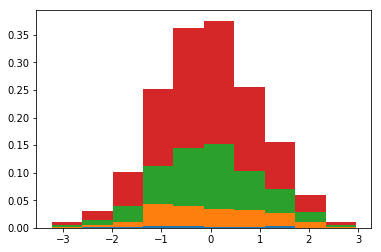

In [14]:
np.random.seed(123)
normal = np.random.randn(500)

print(np.mean(normal[:10]))
print(np.mean(normal[:100]))
print(np.mean(normal[:250]))
print(np.mean(normal))

plt.hist([normal[:10], normal[:100], normal[:250], normal], density=True, histtype='bar', stacked=True)

print(normal[normal > 2])

In [15]:
print(np.std(normal[:10]))
print(np.std(normal[:100]))
print(np.std(normal[:250]))
print(np.std(normal))

1.236304801499023
1.128240470477961
1.0174604368340197
1.0032028561568238


In [33]:
def bimodal(n):
    X = np.zeros(n)
    for i in range(n):
        if(np.random.binomial(1,0.5) == 0):
            X[i] = np.random.normal(-5,1)
        else:
            X[i] = np.random.normal(5,1)
    return X

0.13647000331717293
5.142717506729476


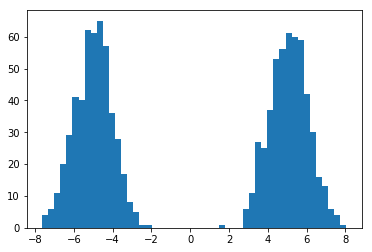

In [34]:
X = bimodal(1000)

plt.hist(X, bins=50)
print(np.mean(X))
print(np.std(X))

(array([ 2.,  0.,  1.,  2.,  4.,  2.,  7., 12., 12., 19., 17., 27., 34.,
        29., 45., 32., 38., 41., 52., 50., 61., 45., 72., 47., 50., 41.,
        38., 37., 29., 28., 22., 19., 13., 20., 15.,  9.,  4.,  2.,  6.,
         1.,  4.,  1.,  2.,  2.,  3.,  1.,  0.,  1.,  0.,  1.]),
 array([-14.36114675, -13.68123578, -13.00132481, -12.32141384,
        -11.64150288, -10.96159191, -10.28168094,  -9.60176997,
         -8.921859  ,  -8.24194803,  -7.56203706,  -6.88212609,
         -6.20221513,  -5.52230416,  -4.84239319,  -4.16248222,
         -3.48257125,  -2.80266028,  -2.12274931,  -1.44283835,
         -0.76292738,  -0.08301641,   0.59689456,   1.27680553,
          1.9567165 ,   2.63662747,   3.31653843,   3.9964494 ,
          4.67636037,   5.35627134,   6.03618231,   6.71609328,
          7.39600425,   8.07591521,   8.75582618,   9.43573715,
         10.11564812,  10.79555909,  11.47547006,  12.15538103,
         12.83529199,  13.51520296,  14.19511393,  14.8750249 ,
         15.

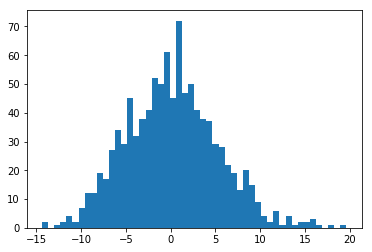

In [38]:
mu = np.mean(X)
sigma = np.std(X)

N = np.random.normal(mu, sigma, 1000)

plt.hist(N, bins = 50)

In [40]:
from statsmodels.stats.stattools import jarque_bera

_, pvalue, _, _ = jarque_bera(X)

if pvalue<0.05:
    print('null hypothesis wrong  -nonnormal distribution')
else:
    print('null hypothesis correct - normal distribution')

null hypothesis wrong  -nonnormal distribution


In [42]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree) / np.std(asset - riskfree)

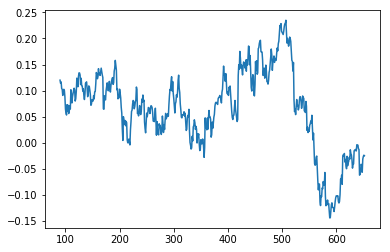

In [80]:
treasury_ret =  pdr.data.DataReader('BIL', data_source='yahoo', start=datetime(2012,1,1), end=datetime(2015,1,1)).iloc[:, -1].pct_change()[1:]
pricing = pdr.data.DataReader('AMZN', data_source='yahoo', start=datetime(2012,1,1), end=datetime(2015,1,1)).iloc[:, -1]
returns = pricing.pct_change()[1:,]


running_sharpe = [sharpe_ratio(returns[i-90:i], treasury_ret[i-90:i]) for i in range(90, len(returns))]

_,ax1 = plt.subplots()
ax1.plot(range(90, len(returns) - 100), running_sharpe[:-100])
ticks = ax1.get_xticks()

0.06406517392784278
0.07774920788832326
0.20532460755553836


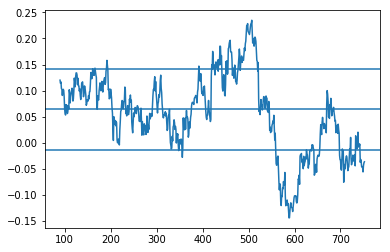

In [85]:
mean_rs = np.mean(running_sharpe[:-100])
st_rs = np.std(running_sharpe[:-100])

print(mean_rs)
print(st_rs)

_, ax2 = plt.subplots()
ax2.plot(range(90, len(returns)), running_sharpe)

ax2.axhline(mean_rs)
ax2.axhline(mean_rs + st_rs)
ax2.axhline(mean_rs - st_rs)

print(st_rs/np.ptp(running_sharpe))

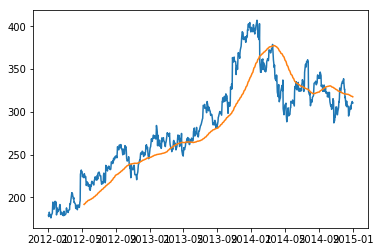

In [89]:
pricing = pdr.data.DataReader('AMZN', data_source='yahoo', start=datetime(2012,1,1), end=datetime(2015,1,1)).iloc[:, -1]

mu = pricing.rolling(90).mean()

_, ax1 = plt.subplots()

ax1.plot(pricing)
ax1.plot(mu)

In [90]:
print(np.mean(mu))
print(np.std(mu))

288.38633955239277
51.1351502493079


17.403827723705366
7.5446920824802834


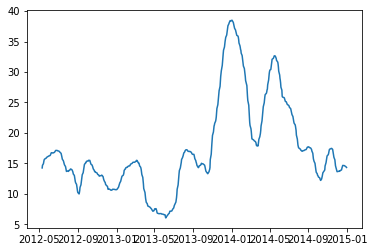

In [91]:
std = pricing.rolling(90).std()

_, ax2 = plt.subplots()
ax2.plot(std)

print(np.mean(std))
print(np.std(std))

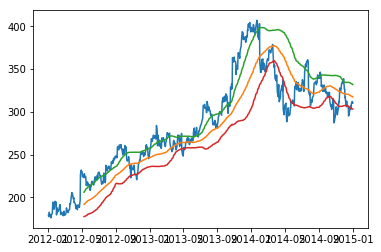

In [92]:
_,ax3 = plt.subplots()
ax3.plot(pricing)

ax3.plot(mu)
ax3.plot(mu + std)
ax3.plot(mu - std)